In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **연속확률분포**

| X~이산확률분포| X~연속확률분포 |
|----------|----------|
| PMF : P(X   = x)   | PDF $F_x(X)$   |
| CDF : P(X $\le$ x)   | CDF : P(X $\le$ x)   |

연속확률분포는 이산확률분포와 다르게 PMF 값의 개념이 없고 PDF 값의 개념으로존재한다

연속 확률 분포에서 PMF 처럼 특정 값의 확률을 얻지 않는 이유는 

연속 확률 분포는 매우 많은 실수값들의 분포이기 때문에 특정 값의 확률값은 0에 가까울 정도로 매우 작은 수가 나오게 된다.

대신 범위  또는 간격의 확률을 계산하는데 중점을 두는데, 주로 CDF를 이용하여 연속 확률 분포에서의 상대적 가능성을 제공한다.

이산 확률 분포에서는 CDF 를 구할 때 시그마를 통해 값을 더해줬듯이

연속 확률 분포에서 CDF 를 구할 때는 무한하고 미분 가능한 분포에서의 누적 확률이기 때문에 적분을 취해준다

$P(a \leq X \leq b) = \int_{a}^{b} f(x) \, dx$


# **균등분포**

$X$~$U(a,b)$

균등분포는  주어진 간격 내의 모든 값이 동일한 확률로 발생하는 확률 분포이다.

구간 내에서 일정한 확률밀도함수가 있고 구간 밖에서의 확률은 0이다

분포는 대칭이며 편평하거나 직사각형이다.

Text(9, 0.101, 'High')

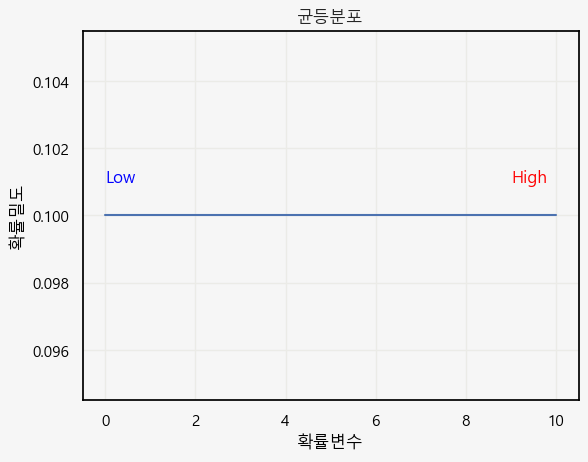

In [2]:
low, high = 0,10

X = np.linspace(low,high,100)

pdf = np.ones_like(X) / (high - low)

fig,ax = plt.subplots()
ax.plot(X,pdf)
ax.set_xlabel('확률변수')
ax.set_ylabel('확률밀도')
ax.set_title('균등분포')
ax.annotate('Low',xy = (0,0.101), color = 'blue')
ax.annotate('High',xy = (9,0.101), color = 'red')

# **균등 분포의 확률밀도 함수**

확률 밀도 함수에서 누적 확률 밀도 함수 값의 총합이 모두 1이 되어야 한다.

U(a,b) (a,b 는 최소값, 최대값) 에서 각 지점 별 확률 밀도 함수 값은 

$f_x(X)$ = 1 / b-a (a < x < b) 


$f_x(X)$ = 0 (a > x or x > b) 


전체 확률을 최소값과 최대값에 위치하는 수별로 나눈 것이다.

# **균등 분포의 누적 확률 밀도 함수**


**CDF** : $\int_{a}^{b}f(t)dt$  = 1 


$X$~$(a,b)$ 에서 구간 내 값들의 누적 확률 밀도 함수 값은 a에서 b로 갈 수록 증가하는 양상을 보인다.

Text(0.5, 1.0, '균등분포의 CDF')

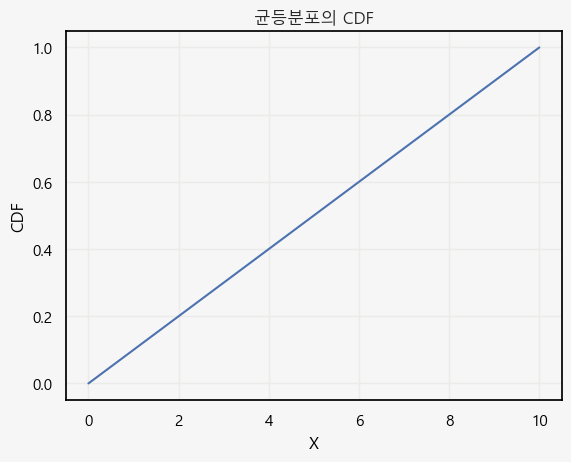

In [3]:
X = np.linspace(low,high,100)
cdf = np.linspace(low,1,100)

fig,ax = plt.subplots()

ax.plot(X,cdf)
ax.set_xlabel('X')
ax.set_ylabel('CDF')
ax.set_title('균등분포의 CDF')

# **균등분포의 기대값**

$E(X) = \int_{a}^{b}  t f(t)dt$ 

에서 f(t)dt 는 균등 분포의 확률밀도 함수를 의미한다.

$E(X) = \int_{a}^{b}  \frac{x}{b-a}dx$ 

해당 값을 X 에 대해 적분하여 식을 계산해나가면

$E(X)=\int _a^bxf(x)dx$

$=\int _a^bx\frac{1}{b-a}dx$

$=\frac{1}{b-a}\int _a^bxdx$


$=\frac{1}{b-a}*\frac{b^2-a^2}{2}$

$ =\frac{1}{b-a}*\frac{(b-a)(b+a)}{2}a$

$ =\frac{a+b}{2}$


라는 값이 나온다.

균등 분포에서 기대값은 최소값과 최대값의 절반 지점이라는 말이 이해가 잘 된다.

# **균등분포의 분산**

$Var(X) = E(\int_{a}^{b}(X - E(X))^2)$

$Var(X) = E(\int_{a}^{b}(X - \frac{a+b}{2})^2)$

계산해보면

$Var(X) = \frac{(b-a)^2}{12}$

# **균등 분포의 보편성**

어떤 확률 분포를 따르는 X에 대한 난수를 생성하고 싶을 때 

X 의 누적 확률 분포를 구할 수만 있다면 X에 대한 난수를 생성 할 수 있다.

X 의 CDF 를 $f_x(X)$ 라고 칭해보자 

이 때 $f_x(X)$ 는 해당 분포의 확률 변수들 $x_1$ 부터 $x_n$ 까지 확률변수들과 1:1 대응하며 0과 1 사이의 값을 갖는다.

$CDF$ = $f_x(X)$

CDF 는 확률 변수들과 1:1 매칭 되는 함수이기 때문에 역함수를  구할 수 있다.

이 때 $f_x(X)$ 의 역함수를 $f^{-1}_{x}$ 이라고 한다면 

$f^{-1}_{x}(U)$, 즉 CDF 의 역함수에 0과 1사이의 균등분포에서 추출한 확률변수값들을 넣게 되면 

CDF 의 분포를 따르는 확률 변수 X 들을 구할 수 있다.

# **예시**

### **로지스틱 분포를 따르는 난수 생성**

로지스틱 분포의 CDF 식은 다음과 같다 

$F_x(X) = \frac{e^x}{1+e^x}$

$F^{-1}_x(X)$ 를 구해보자 

$F^{-1}_x(X) = ln^{\frac{X}{1-X}}$

이 때 $F^{-1}_x(X)$ 에 0과 1사이의 균등분포에서 추출한 확률변수 값들을 넣어주게 되면 

$X = F^{-1}_x(U)$ 를 구할 수 있다.

Text(0.5, 1.1, '균등 분포의 보편성을 이용하여 분포 생성')

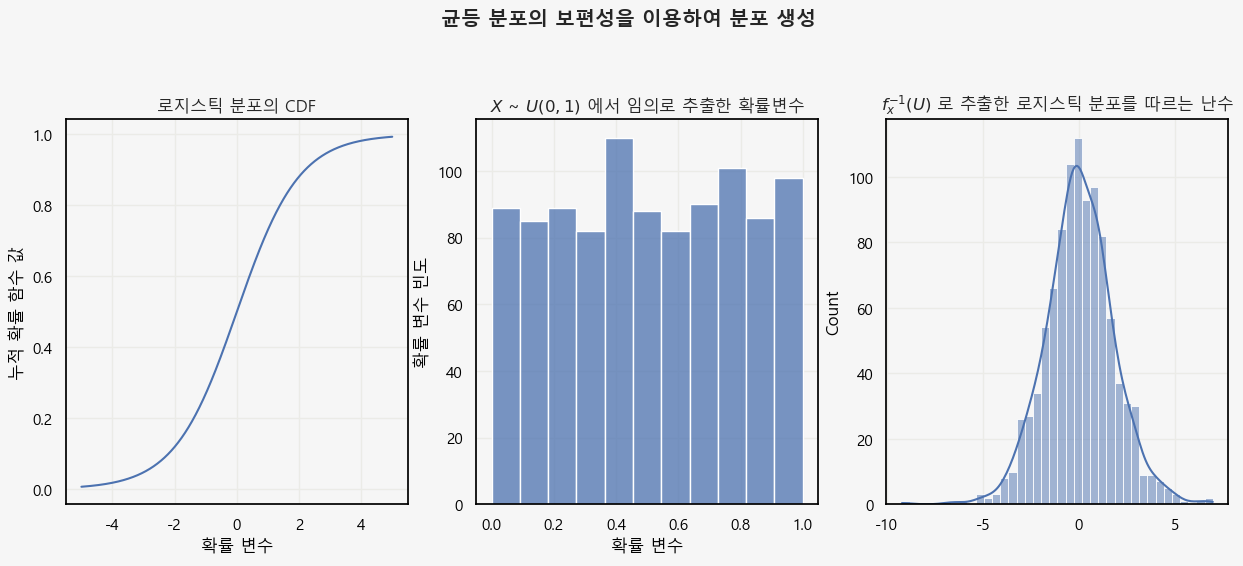

In [53]:
# 로지스틱 분포의 CDF 

X = np.linspace(-5,5,1000)
CDF = np.exp(X) / (1+np.exp(X))


fig,ax = plt.subplots(ncols = 3, figsize = (15,5))

ax[0].plot(X,CDF)
ax[0].set_title('로지스틱 분포의 CDF')
ax[0].set_xlabel('확률 변수')
ax[0].set_ylabel('누적 확률 함수 값')

U = np.random.uniform(size = 1000)

sns.histplot(data=  U, ax =  ax[1])
ax[1].set_title('$X$ ~ $U(0,1)$ 에서 임의로 추출한 확률변수')
ax[1].set_xlabel('확률 변수')
ax[1].set_ylabel('확률 변수 빈도')

sns.histplot(np.log(U/(1-U)), ax = ax[2], kde = True)
ax[2].set_title('$f^{-1}_x(U)$ 로 추출한 로지스틱 분포를 따르는 난수')

fig.suptitle('균등 분포의 보편성을 이용하여 분포 생성', y = 1.1, weight = 'bold')